In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import tensorflow as tf
import numpy as np

# Retrieve all the masks wore types images
masks_folders_names = os.listdir("data")
imgFileName = []
width = []
height = []
croppedResizedGrayImg = []
targetClass = []

for masks_folder_name in masks_folders_names:
    print(masks_folder_name)
    for fname in os.listdir("data\\" + masks_folder_name):        
        img = cv2.imread(os.path.join("data", masks_folder_name, fname))
        imgFileName.append(fname)
        width.append(img.shape[1])
        height.append(img.shape[0])
        # convert image to grayscale, crop, and resize
        croppedResizedGrayImg.append(cv2.cvtColor(cv2.resize(np.asarray(tf.image.central_crop(img, central_fraction=0.5)), (256, 256)), cv2.COLOR_BGR2GRAY))
        targetClass.append(masks_folder_name)
        # print(fname)

data = pd.DataFrame({'imgfileName': imgFileName, 'width': width, 'height': height, 'croppedResizedGrayImg': croppedResizedGrayImg, 'targetClass': targetClass})

no_tag
tag


In [2]:
# upsample the samples in Mask Correctly Worn and Mask Not Worn classes through flipping
rotatedGrayImg = []
targetClass = []
for i in range(0, len(data)):
    img = data.loc[i, 'croppedResizedGrayImg']
    rotatedGrayImg.append(cv2.flip(img, 0))
    rotatedGrayImg.append(cv2.flip(img, 1))
    rotatedGrayImg.append(cv2.flip(img, -1))
    targetClass.append(data.loc[i, 'targetClass'])
    targetClass.append(data.loc[i, 'targetClass'])
    targetClass.append(data.loc[i, 'targetClass'])

augmt_data = pd.DataFrame({'imgfileName': None, 'width': 0, 'height': 0, 'croppedResizedGrayImg': rotatedGrayImg, 'targetClass': targetClass})
data = data.append(augmt_data, ignore_index = True)

C:\Users\Kar Lok\AppData\Local\Temp\ipykernel_2472\2096072461.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(augmt_data, ignore_index = True)


In [3]:
data.imgfileName.unique()

array(['no_tag.JPG', 'no_tag1.JPG', 'no_tag10.JPG', 'no_tag111.JPG',
       'no_tag1111.JPG', 'no_tag132.JPG', 'no_tag2.JPG', 'no_tag21.JPG',
       'no_tag22.JPG', 'no_tag222.JPG', 'no_tag3.JPG', 'no_tag4.JPG',
       'no_tag5.JPG', 'no_tag6.JPG', 'no_tag7.JPG', 'no_tag8.JPG',
       'tag.JPG', 'tag.png', 'tag10.JPG', 'tag11.JPG', 'tag111.JPG',
       'tag12.JPG', 'tag15.JPG', 'tag2.JPG', 'tag2.png', 'tag21.JPG',
       'tag3.JPG', 'tag3.png', 'tag31.JPG', 'tag4.JPG', 'tag5.JPG',
       'tag51.JPG', 'tag6.JPG', 'tag7.JPG', 'tag8.JPG', 'tag9.JPG', None],
      dtype=object)

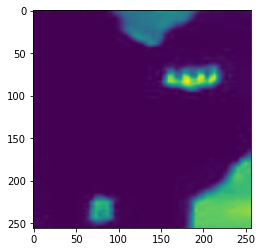

In [4]:
plt.imshow(data.loc[data['imgfileName'] == 'tag21.JPG', 'croppedResizedGrayImg'].values[0])

In [5]:
# Convert the 2-D image to 1-D 
flattenImg = []
for img in data['croppedResizedGrayImg']:
    flattenImg.append(img.flatten())

dataset = pd.DataFrame(flattenImg)
dataset['targetClass'] = data['targetClass'].astype('category').cat.codes

In [6]:
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# seperate the data to independent variables and target variable
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# scale and perform kernel PCA for dimensions reduction
# scaler = MinMaxScaler().fit(x)
# x = scaler.transform(x)
# x = pd.DataFrame(x)
# kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
# kpca_fit = kpca.fit(x)
# x = kpca_fit.transform(x)
# x = pd.DataFrame(x)

# set K-fold as 10 and shuffle the data
# kf = KFold(n_splits=10, shuffle=True)

# # initialize models
# models = {
#     'SVC' : svm.SVC(kernel='linear'),
#     'DT': DecisionTreeClassifier(),
#     'RF': RandomForestClassifier(),
#     'KNN': KNeighborsClassifier()
# }

# metrics = ['accuracy', 'precision', 'recall', 'f1score', 'trained time']
# models_performance = {model: {metric: [] for metric in metrics} for model in models.keys()}

# for model_type, model_obj in models.items():
#     print(model_type)
#     for train_index, test_index in kf.split(x):
#         # partition the data to train and test sets based on each k-fold partition
#         x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
#         y_train, y_test = y[train_index], y[test_index]

#         # fit the model with training data
#         start_time = time.time()
#         model_obj.fit(x_train, y_train)
#         models_performance[model_type]['trained time'].append(time.time() - start_time) 

#         # predict on the testing data
#         y_pred = model_obj.predict(x_test)

#         # store the accuracy store at each fold iteration
#         models_performance[model_type]['accuracy'].append(accuracy_score(y_test, y_pred))
#         models_performance[model_type]['precision'].append(precision_score(y_test, y_pred, average='weighted'))
#         models_performance[model_type]['recall'].append(recall_score(y_test, y_pred, average='weighted'))
#         models_performance[model_type]['f1score'].append(f1_score(y_test, y_pred, average='weighted'))

        # print(confusion_matrix(y_test, y_pred, labels=[0, 1, 2]))

In [7]:
# Get the overall performance score of the models (average the scores obtained in each k-fold iteration)
# from statistics import mean 

# models_overall_performance = {model: {metric: None for metric in metrics} for model in models.keys()}

# for model_type, metrics_dict in models_performance.items():
#     for metric_type, metric_scores in metrics_dict.items():
#         if metric_type != 'trained time':
#             models_overall_performance[model_type][metric_type] = round(mean(metric_scores), 3)
#         else:
#             models_overall_performance[model_type][metric_type] = str(round(sum(metric_scores), 2)) + ' seconds'
    

# models_overall_performance

In [7]:
import pickle

model = RandomForestClassifier()
model.fit(x, y)

with open('tag_detector_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [9]:
# import cv2

# # Load the YOLO model
# net = cv2.dnn.readNet('C:/Users/Kar Lok/Downloads/ai_test/yolov3.weights', 'C:/Users/Kar Lok/Downloads/ai_test/yolov3.cfg')  # Replace with the appropriate YOLO model files

# # Set the target classes
# target_classes = ['person']  # Only detect people

# # Load the tag detector model
# tag_detector_model = pickle.load(open('tag_detector_model.pkl', 'rb'))  # Replace with your trained tag detector model

# # Open the video file
# video_path = 'sample_trim2.mp4'  # Replace with your input video file path
# video = cv2.VideoCapture(video_path)

# # Loop over the video frames
# while video.isOpened():
#     ret, frame = video.read()

#     if not ret:
#         break

#     # Construct a blob from the input frame
#     blob = cv2.dnn.blobFromImage(frame, 1/255, (416, 416), swapRB=True, crop=False)

#     # Set the input blob for the network
#     net.setInput(blob)

#     # Perform forward pass and get the output layer names
#     output_layers = net.getUnconnectedOutLayersNames()
#     layer_outputs = net.forward(output_layers)

#     # Initialize lists for detected person bounding boxes and confidences
#     person_boxes = []
#     person_confidences = []

#     # Loop over the outputs of each layer
#     for output in layer_outputs:
#         # Loop over each detection
#         for detection in output:
#             scores = detection[5:]
#             class_id = np.argmax(scores)
#             confidence = scores[class_id]

#             if class_id == 0 and confidence > 0.5:  # Check if the detection is a person with confidence threshold
#                 center_x = int(detection[0] * frame.shape[1])
#                 center_y = int(detection[1] * frame.shape[0])
#                 width = int(detection[2] * frame.shape[1])
#                 height = int(detection[3] * frame.shape[0])

#                 x = int(center_x - width/2)
#                 y = int(center_y - height/2)

#                 person_boxes.append([x, y, width, height])
#                 person_confidences.append(float(confidence))

#     # Apply non-maximum suppression to eliminate overlapping bounding boxes
#     indices = cv2.dnn.NMSBoxes(person_boxes, person_confidences, score_threshold=0.5, nms_threshold=0.5)

#     # Loop over the remaining person detections
#     for i in indices:
#         # i = i[0]
#         if len(person_boxes) > 0:
#             x, y, w, h = person_boxes[i]

#             # Extract the person region from the frame
#             person_region = frame[y:y+h, x:x+w]

#             if person_region is None:
#                 pass

#             try:
#                 # Resize the person region to match the input size of the tag detector model
#                 resized_person_region = cv2.cvtColor(cv2.resize(person_region, (256, 256)), cv2.COLOR_BGR2GRAY)

#                 # Flatten the resized person region
#                 flattened_person_region = resized_person_region.flatten()

#                 # Pass the flattened person region through the tag detector model
#                 tag_predictions = tag_detector_model.predict([flattened_person_region])
#                 print(tag_predictions)

#                 # Assuming the tag detector model outputs a binary classification (with tag or without tag)
#                 is_staff_with_tag = tag_predictions > 0.5  # Adjust the threshold as needed

#                 if is_staff_with_tag:
#                     # Save the frame and the bounding box coordinates for further analysis
#                     # You can also display the frame or perform any desired operations

#                     # Example: Save the frame with the bounding box
#                     cv2.imwrite('frame_with_tag.jpg', frame)

#                 # Draw the bounding box and label on the frame
#                 cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
#                 label = f'Person {person_confidences[i]:.2f}'
#                 cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                
#             except:
#                 pass

#     # Display the frame or perform any other desired operations
#     cv2.imshow('Frame', frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture and close any open windows
# video.release()
# cv2.destroyAllWindows()


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


KeyboardInterrupt: 

: 

In [9]:
import cv2
import numpy as np
import pickle

# Load the YOLO model
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')  # Replace with the appropriate YOLO model files

# Set the target classes
target_classes = ['person']  # Only detect people

# Load the tag detector model
tag_detector_model = pickle.load(open('tag_detector_model.pkl', 'rb'))  # Replace with your trained tag detector model

# Open the video file
video_path = 'sample_trim2.mp4'  # Replace with your input video file path
video = cv2.VideoCapture(video_path)

# Get the frame rate of the video
fps = video.get(cv2.CAP_PROP_FPS)

# Define the segment duration in seconds
segment_duration = 1

# Calculate the number of frames per segment
segment_frames = int(fps * segment_duration)

# Initialize variables for storing the results
person_regions = []
tag_detections = []

# Process each segment of the video
while True:
    # Read the segment frames
    frames = []
    for _ in range(segment_frames):
        ret, frame = video.read()
        if not ret:
            break
        frames.append(frame)
    
    if len(frames) == 0:
        break
    
    # Perform person detection and tag detection on each frame
    for frame in frames:
        # Construct a blob from the input frame
        blob = cv2.dnn.blobFromImage(frame, 1/255, (416, 416), swapRB=True, crop=False)

        # Set the input blob for the network
        net.setInput(blob)

        # Perform forward pass and get the output layer names
        output_layers = net.getUnconnectedOutLayersNames()
        layer_outputs = net.forward(output_layers)

        # Initialize lists for detected person bounding boxes and confidences
        person_boxes = []
        person_confidences = []

        # Loop over the outputs of each layer
        for output in layer_outputs:
            # Loop over each detection
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]

                if class_id == 0 and confidence > 0.5:  # Check if the detection is a person with confidence threshold
                    center_x = int(detection[0] * frame.shape[1])
                    center_y = int(detection[1] * frame.shape[0])
                    width = int(detection[2] * frame.shape[1])
                    height = int(detection[3] * frame.shape[0])

                    x = int(center_x - width/2)
                    y = int(center_y - height/2)

                    person_boxes.append([x, y, width, height])
                    person_confidences.append(float(confidence))

        # Apply non-maximum suppression to eliminate overlapping bounding boxes
        indices = cv2.dnn.NMSBoxes(person_boxes, person_confidences, score_threshold=0.5, nms_threshold=0.5)

        # Loop over the remaining person detections
        for i in indices:
            # i = i[0]
            x, y, w, h = person_boxes[i]

            # Extract the person region from the frame
            person_region = frame[y:y+h, x:x+w]

            # Perform tag detection on the person region
            if person_region is not None:

                try:
                    # Resize the person region to match the input size of the tag detector model
                    resized_person_region = cv2.cvtColor(cv2.resize(person_region, (256, 256)), cv2.COLOR_BGR2GRAY)

                    # Flatten the resized person region
                    flattened_person_region = resized_person_region.flatten()

                    # Pass the flattened person region through the tag detector model
                    tag_predictions = tag_detector_model.predict([flattened_person_region])

                    # Assuming the tag detector model outputs a binary classification (with tag or without tag)
                    is_staff_with_tag = tag_predictions > 0.5  # Adjust the threshold as needed

                    if is_staff_with_tag:
                        # Save the frame with the bounding box and xy coordinates
                        output_frame = frame.copy()
                        cv2.rectangle(output_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                        label = f'Person {person_confidences[i]:.2f} | (x:{x}, y:{y})'
                        cv2.putText(output_frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                        cv2.imwrite(f'frame_with_tag_{len(person_regions)}.png', output_frame)

                    # Store the person region and tag detection result
                    person_regions.append(person_region)
                    tag_detections.append(is_staff_with_tag)
                except:
                    pass

    # Display the frames or perform any other desired operations
    for frame in frames:
        cv2.imshow('Frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the video capture and close any open windows
video.release()
cv2.destroyAllWindows()


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
